<a href="https://colab.research.google.com/github/profliuhao/CSIT359/blob/main/CSIT359_class9_color_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

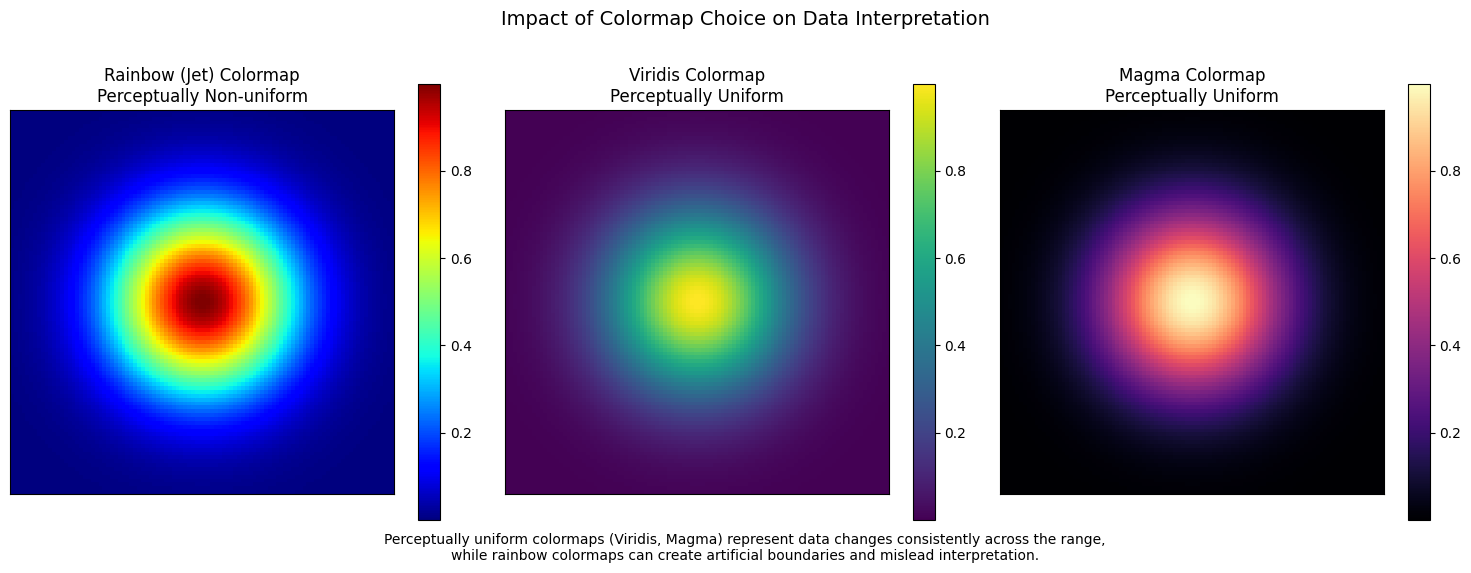

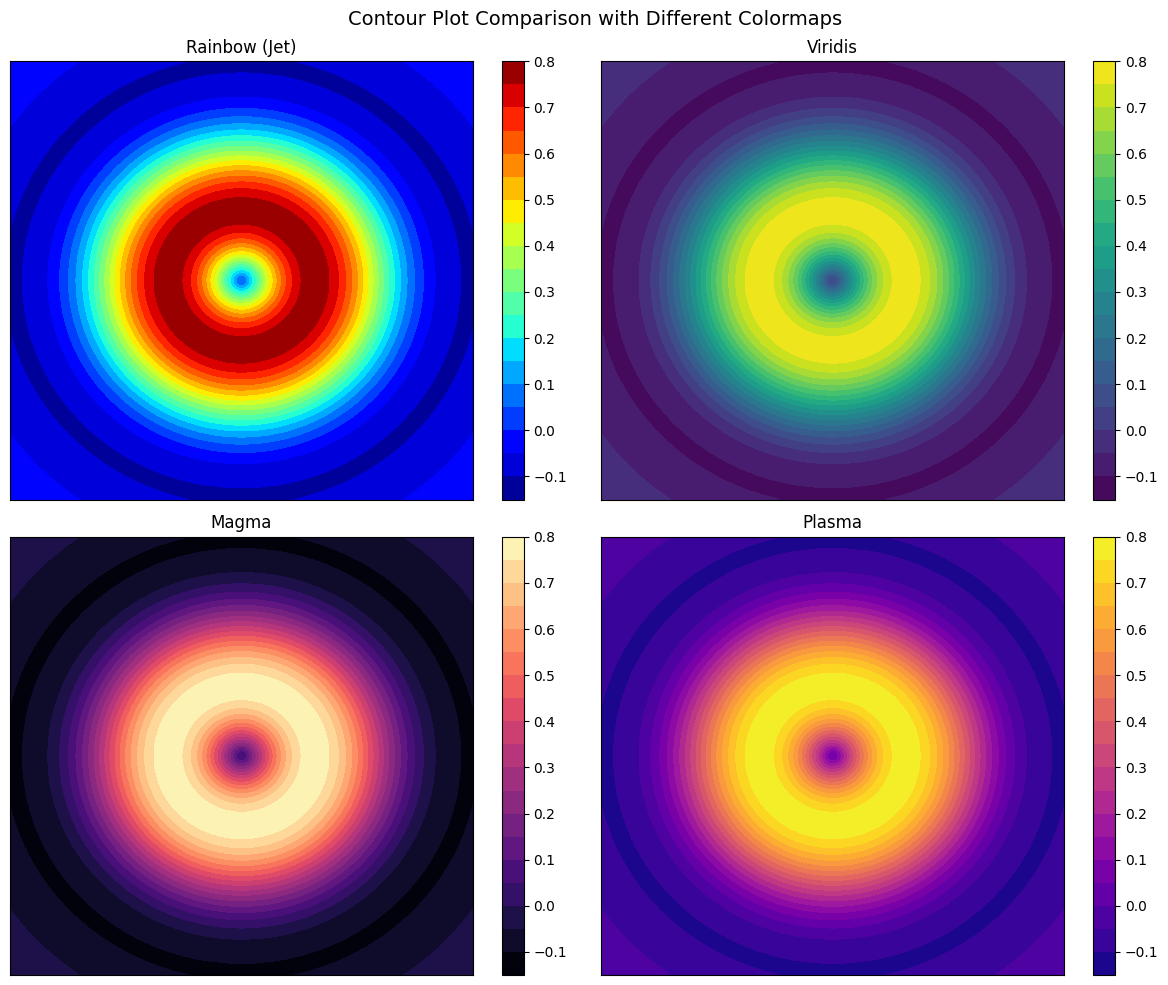

In [ ]:
# Create sample data: a 2D Gaussian distribution
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = np.exp(-(X**2 + Y**2)/2) # 2D Gaussian

# Create the figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Impact of Colormap Choice on Data Interpretation', fontsize=14, y=1.05)

# Plot 1: Rainbow colormap (potentially misleading)
rainbow = axes[0].imshow(Z, cmap='jet')
axes[0].set_title('Rainbow (Jet) Colormap\nPerceptually Non-uniform')
plt.colorbar(rainbow, ax=axes[0])
axes[0].set_xticks([])
axes[0].set_yticks([])

# Plot 2: Viridis colormap
viridis = axes[1].imshow(Z, cmap='viridis')
axes[1].set_title('Viridis Colormap\nPerceptually Uniform')
plt.colorbar(viridis, ax=axes[1])
axes[1].set_xticks([])
axes[1].set_yticks([])

# Plot 3: Magma colormap
magma = axes[2].imshow(Z, cmap='magma')
axes[2].set_title('Magma Colormap\nPerceptually Uniform')
plt.colorbar(magma, ax=axes[2])
axes[2].set_xticks([])
axes[2].set_yticks([])

# Add explanatory text
fig.text(0.5, -0.05,
         'Perceptually uniform colormaps (Viridis, Magma) represent data changes consistently across the range,\n' +
         'while rainbow colormaps can create artificial boundaries and mislead interpretation.',
         ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Now let's create a second figure showing how different colormaps affect
# the perception of the same data in a contour plot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Contour Plot Comparison with Different Colormaps', fontsize=14)

# Create more complex data for contour demonstration
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2)) * np.exp(-(X**2 + Y**2)/8)

colormaps = ['jet', 'viridis', 'magma', 'plasma']
titles = ['Rainbow (Jet)', 'Viridis', 'Magma', 'Plasma']

for ax, cmap, title in zip(axes.flat, colormaps, titles):
    contour = ax.contourf(X, Y, Z, levels=20, cmap=cmap)
    ax.set_title(title)
    plt.colorbar(contour, ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

In [12]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create data for visualization
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)

# Data for contour plots
Z_contour = np.sin(np.sqrt(X**2 + Y**2)) * np.exp(-(X**2 + Y**2)/8)

# Data for Gaussian distribution
sigma = 1.5
Z_gauss = np.exp(-(X**2 + Y**2)/(2*sigma**2))

# Create subplots with 2 rows and 4 columns
fig = make_subplots(
    rows=2,
    cols=4,
    subplot_titles=[
        'Rainbow (Jet)', 'Viridis', 'Magma', 'Plasma',
        'Rainbow (Jet)', 'Viridis', 'Magma', 'Plasma'
    ],
    vertical_spacing=0.2,
    horizontal_spacing=0.03,
    specs=[[{}, {}, {}, {}], [{}, {}, {}, {}]]
)

# Add annotations to explain each section
fig.add_annotation(
    text="Contour Plot Comparison with Different Colormaps",
    xref="paper", yref="paper",
    x=0.5, y=1.12,
    showarrow=False,
    font=dict(size=18, color="black"),
)

fig.add_annotation(
    text="Purpose: To demonstrate how different colormaps affect the perception of complex data structures.",
    xref="paper", yref="paper",
    x=0.5, y=1.08,
    showarrow=False,
    font=dict(size=14, color="black"),
    bgcolor="rgba(240, 240, 240, 0.7)",
    bordercolor="rgba(0, 0, 0, 0.3)",
    borderwidth=1,
    borderpad=4,
    width=800
)

fig.add_annotation(
    text="2D Gaussian Distribution with Different Colormaps",
    xref="paper", yref="paper",
    x=0.5, y=0.54,
    showarrow=False,
    font=dict(size=18, color="black"),
)

fig.add_annotation(
    text="Purpose: To show how colormaps affect the perception of smooth probability distributions.",
    xref="paper", yref="paper",
    x=0.5, y=0.50,
    showarrow=False,
    font=dict(size=14, color="black"),
    bgcolor="rgba(240, 240, 240, 0.7)",
    bordercolor="rgba(0, 0, 0, 0.3)",
    borderwidth=1,
    borderpad=4,
    width=800
)

# Colormaps and their descriptions
colormaps = ['jet', 'viridis', 'magma', 'plasma']
contour_descriptions = [
    'Creates artificial boundaries<br>and can mislead viewers',
    'Perceptually uniform with<br>good contrast throughout',
    'Dark-to-light gradient with<br>red highlights',
    'Purple-to-yellow with<br>excellent dynamic range'
]

gauss_descriptions = [
    'Central peak less visible due<br>to sharp color transitions',
    'Smooth gradient shows<br>distribution accurately',
    'Dark background highlights<br>central peak effectively',
    'High contrast between<br>peak and periphery'
]

# Add contour plots (first row)
for i, cmap in enumerate(colormaps):
    fig.add_trace(
        go.Contour(
            z=Z_contour,
            x=x,
            y=y,
            colorscale=cmap,
            contours=dict(
                start=-0.15,
                end=0.95,
                size=0.05,
                showlabels=False
            ),
            colorbar=dict(
                title="Value",
                thickness=15,
                len=0.3,
                y=0.8,
                yanchor="middle"
            ),
            hovertemplate="x: %{x:.2f}<br>y: %{y:.2f}<br>value: %{z:.3f}<extra></extra>"
        ),
        row=1, col=i+1
    )

    # Add descriptions for contour plots
    fig.add_annotation(
        text=contour_descriptions[i],
        xref=f"x{i+1}", yref=f"y{i+1}",
        x=0, y=-3.5,
        showarrow=False,
        font=dict(size=12, color="black"),
        bgcolor="rgba(255, 255, 255, 0.7)",
        bordercolor="rgba(0, 0, 0, 0.3)",
        borderwidth=1,
        borderpad=4,
        align="center"
    )

# Add Gaussian plots (second row)
for i, cmap in enumerate(colormaps):
    fig.add_trace(
        go.Heatmap(
            z=Z_gauss,
            x=x,
            y=y,
            colorscale=cmap,
            colorbar=dict(
                title="Value",
                thickness=15,
                len=0.3,
                y=0.2,
                yanchor="middle"
            ),
            hovertemplate="x: %{x:.2f}<br>y: %{y:.2f}<br>value: %{z:.3f}<extra></extra>"
        ),
        row=2, col=i+1
    )

    # Add descriptions for Gaussian plots
    fig.add_annotation(
        text=gauss_descriptions[i],
        xref=f"x{i+5}", yref=f"y{i+5}",
        x=0, y=-3.5,
        showarrow=False,
        font=dict(size=12, color="black"),
        bgcolor="rgba(255, 255, 255, 0.7)",
        bordercolor="rgba(0, 0, 0, 0.3)",
        borderwidth=1,
        borderpad=4,
        align="center"
    )

# Add a key takeaway at the bottom
fig.add_annotation(
    text="Key Point: Colormap choice significantly impacts data interpretation.<br>Scientific visualizations should use perceptually uniform colormaps rather than rainbow colormaps.",
    xref="paper", yref="paper",
    x=0.5, y=-0.1,
    showarrow=False,
    font=dict(size=16, color="black", family="Arial Bold"),
    bgcolor="rgba(220, 220, 220, 0.7)",
    bordercolor="rgba(0, 0, 0, 0.5)",
    borderwidth=1,
    borderpad=6,
    width=1000
)

# Update layout for better appearance
fig.update_layout(
    title=dict(
        text="Colormap Comparisons for Scientific Visualization",
        font=dict(size=24),
        y=0.98
    ),
    width=1400,
    height=1000,
    margin=dict(t=200, b=150, l=80, r=80),
    showlegend=False,
    plot_bgcolor="white",
)

# Update axes for clean look
fig.update_xaxes(showticklabels=False, showgrid=False, zeroline=False)
fig.update_yaxes(showticklabels=False, showgrid=False, zeroline=False)

# Show the figure
fig.show()

<ipython-input-40-a84c71281255>:31: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  states['population_density'] = states['population_density'] * (states.area / states.area.mean())


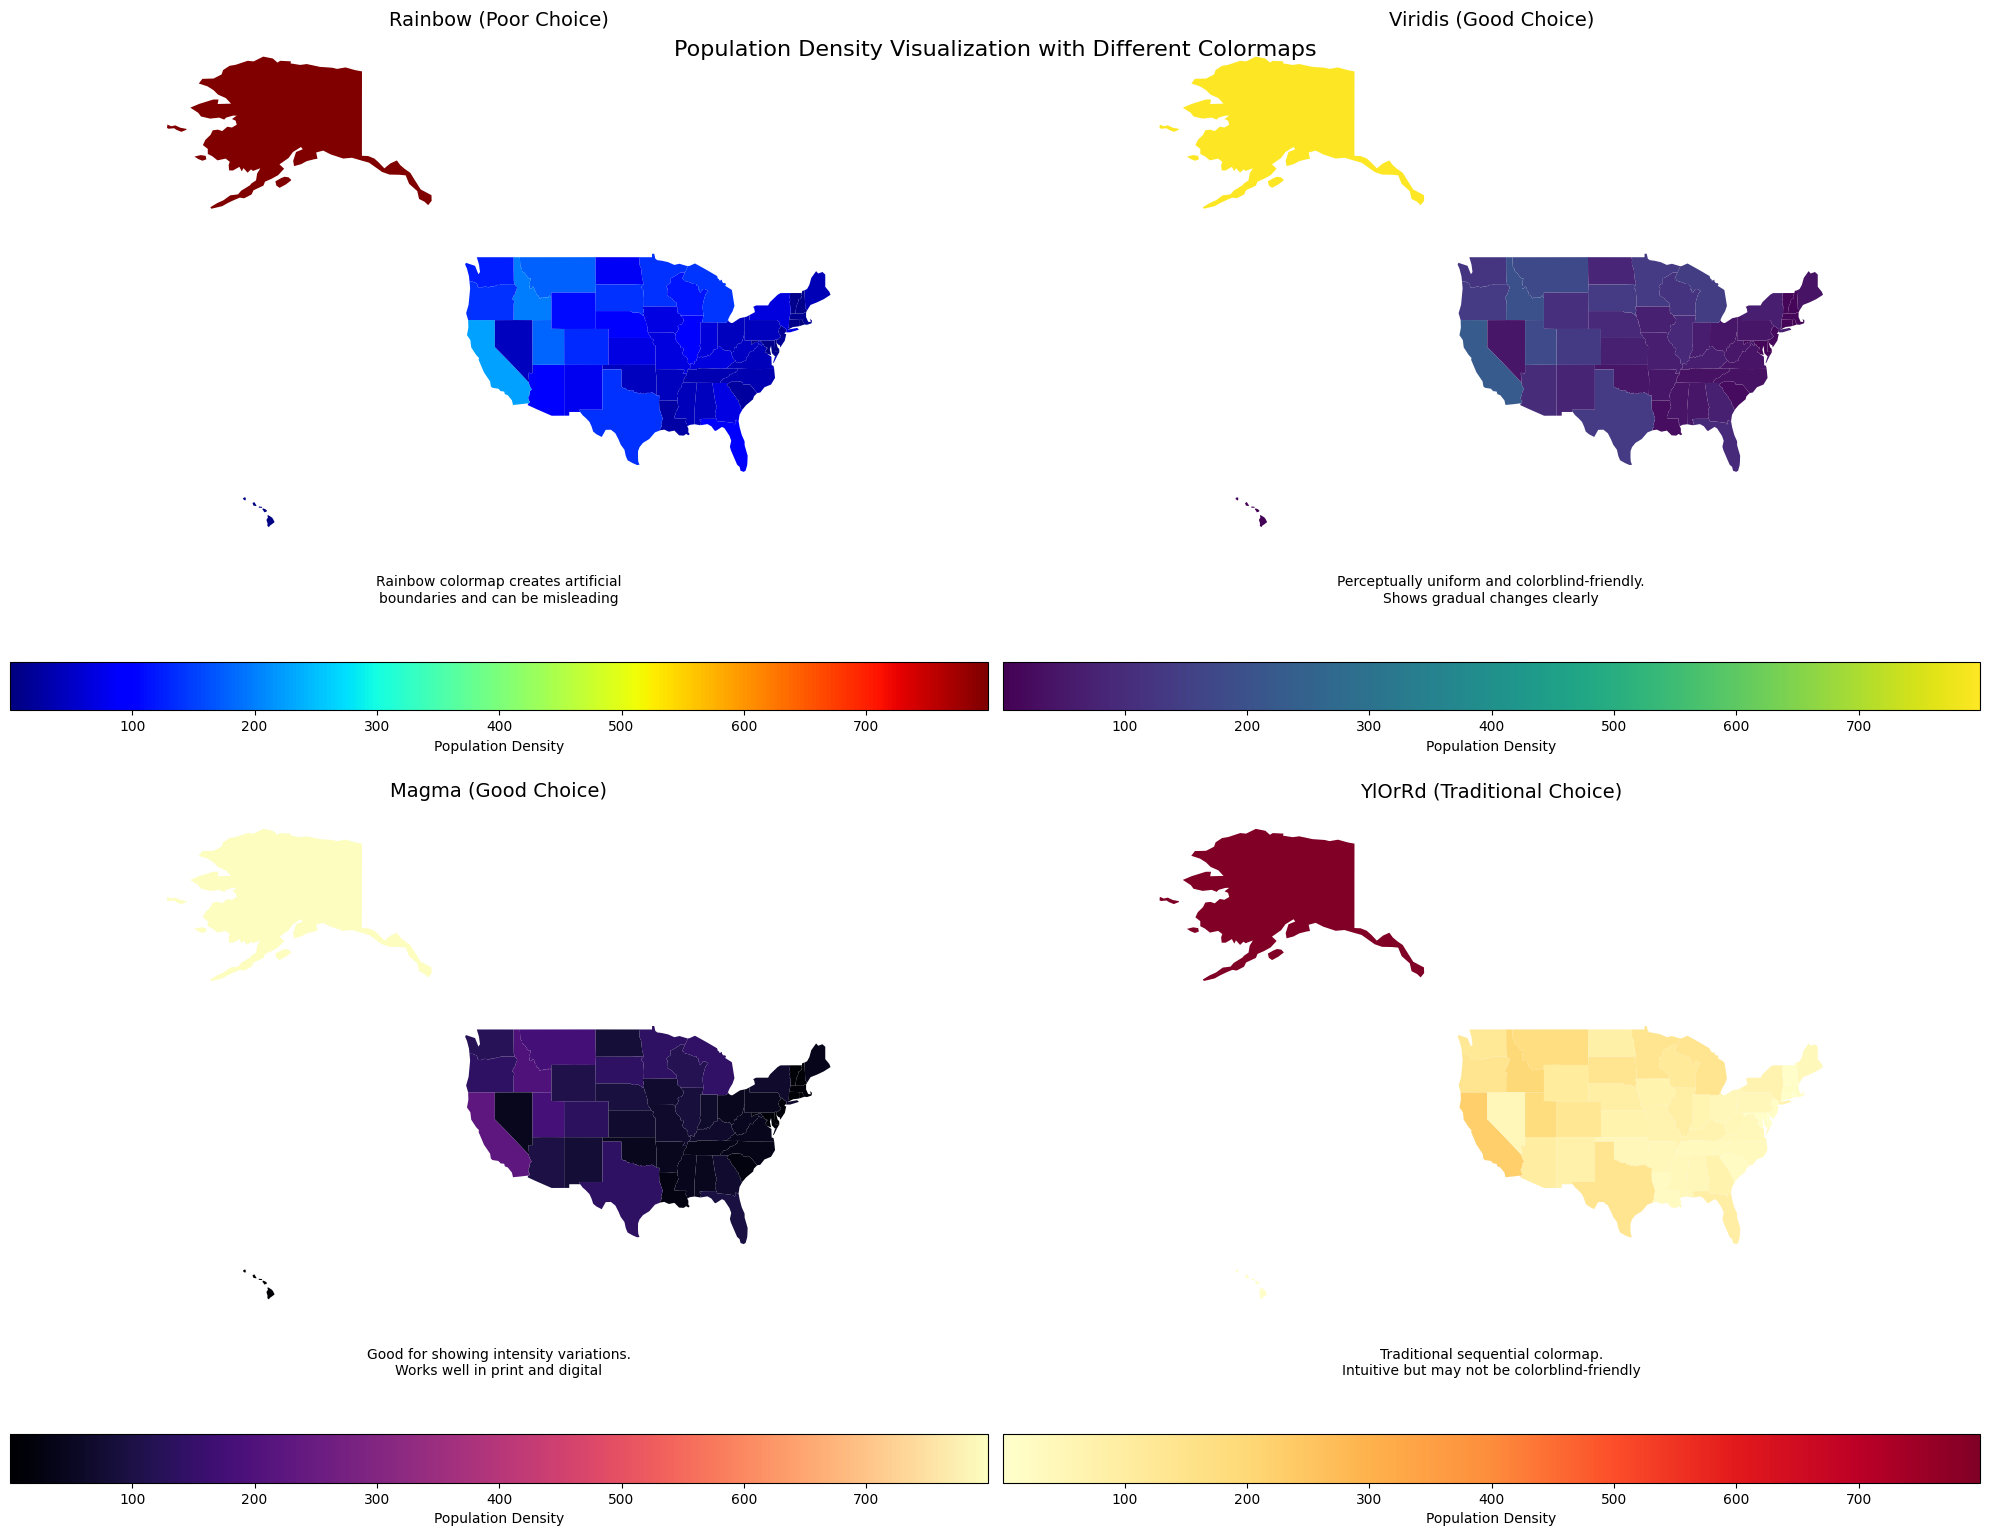

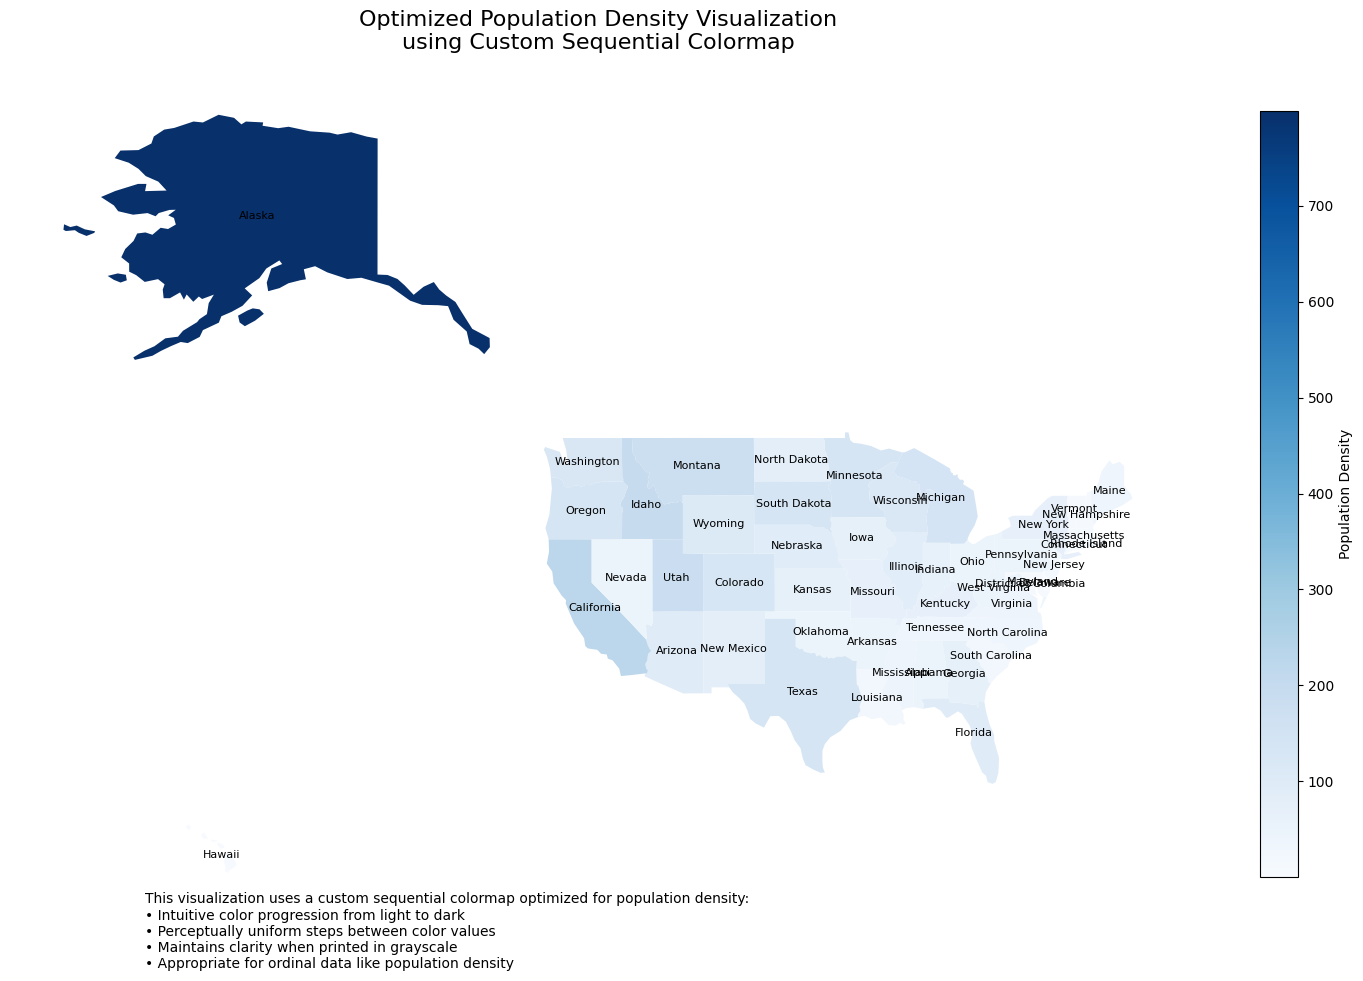

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Load US states geometry and population data
# Download and process shapefile
print("Downloading geographic data...")
url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_1_states_provinces.geojson"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    states_gdf = gpd.read_file(io.StringIO(response.content.decode('utf-8')))
    states_gdf = states_gdf[states_gdf['admin'] == 'United States of America']

else:
    raise requests.RequestException(
        f"Failed to download geographic data. Status code: {response.status_code}"
    )
states = states_gdf

# Create synthetic population density data (for demonstration)
# In real application, you would load actual census data
np.random.seed(42)
states['population_density'] = np.random.gamma(5, scale=20, size=len(states))
states['population_density'] = states['population_density'] * (states.area / states.area.mean())

# Create figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Population Density Visualization with Different Colormaps', fontsize=16, y=0.95)

# Different colormaps to compare
cmaps = ['jet', 'viridis', 'magma', 'YlOrRd']
titles = ['Rainbow (Poor Choice)', 'Viridis (Good Choice)',
         'Magma (Good Choice)', 'YlOrRd (Traditional Choice)']

for ax, cmap, title in zip(axes.flat, cmaps, titles):
    # Plot the map
    states.plot(column='population_density',
               cmap=cmap,
               legend=True,
               legend_kwds={'label': 'Population Density',
                          'orientation': 'horizontal'},
               ax=ax)

    # Customize the appearance
    ax.set_title(title, fontsize=14)
    ax.axis('off')

    # Add text explaining the implications of this colormap
    if cmap == 'jet':
        ax.text(0.5, -0.1,
                'Rainbow colormap creates artificial\nboundaries and can be misleading',
                transform=ax.transAxes, ha='center', fontsize=10)
    elif cmap == 'viridis':
        ax.text(0.5, -0.1,
                'Perceptually uniform and colorblind-friendly.\nShows gradual changes clearly',
                transform=ax.transAxes, ha='center', fontsize=10)
    elif cmap == 'magma':
        ax.text(0.5, -0.1,
                'Good for showing intensity variations.\nWorks well in print and digital',
                transform=ax.transAxes, ha='center', fontsize=10)
    else:
        ax.text(0.5, -0.1,
                'Traditional sequential colormap.\nIntuitive but may not be colorblind-friendly',
                transform=ax.transAxes, ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Now let's create a more detailed single map with a better colormap
# and additional features for optimal visualization
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Create a custom colormap that's optimized for population density
colors = ['#f7fbff', '#deebf7', '#c6dbef', '#9ecae1', '#6baed6', '#4292c6', '#2171b5', '#08519c', '#08306b']
n_bins = 256
custom_cmap = LinearSegmentedColormap.from_list('custom_blues', colors, N=n_bins)

# Plot with the custom colormap
states.plot(column='population_density',
           cmap=custom_cmap,
           legend=True,
           legend_kwds={'label': 'Population Density',
                      'orientation': 'vertical',
                      'shrink': 0.8},
           ax=ax)

# Add state labels for reference
for idx, row in states.iterrows():
    ax.annotate(text=row['name'],
                xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                ha='center', va='center',
                fontsize=8)

ax.set_title('Optimized Population Density Visualization\nusing Custom Sequential Colormap',
             fontsize=16, pad=20)
ax.axis('off')

# Add explanatory text
fig.text(0.1, 0.02,
         'This visualization uses a custom sequential colormap optimized for population density:\n' +
         '• Intuitive color progression from light to dark\n' +
         '• Perceptually uniform steps between color values\n' +
         '• Maintains clarity when printed in grayscale\n' +
         '• Appropriate for ordinal data like population density',
         fontsize=10, ha='left')

plt.tight_layout()
plt.show()

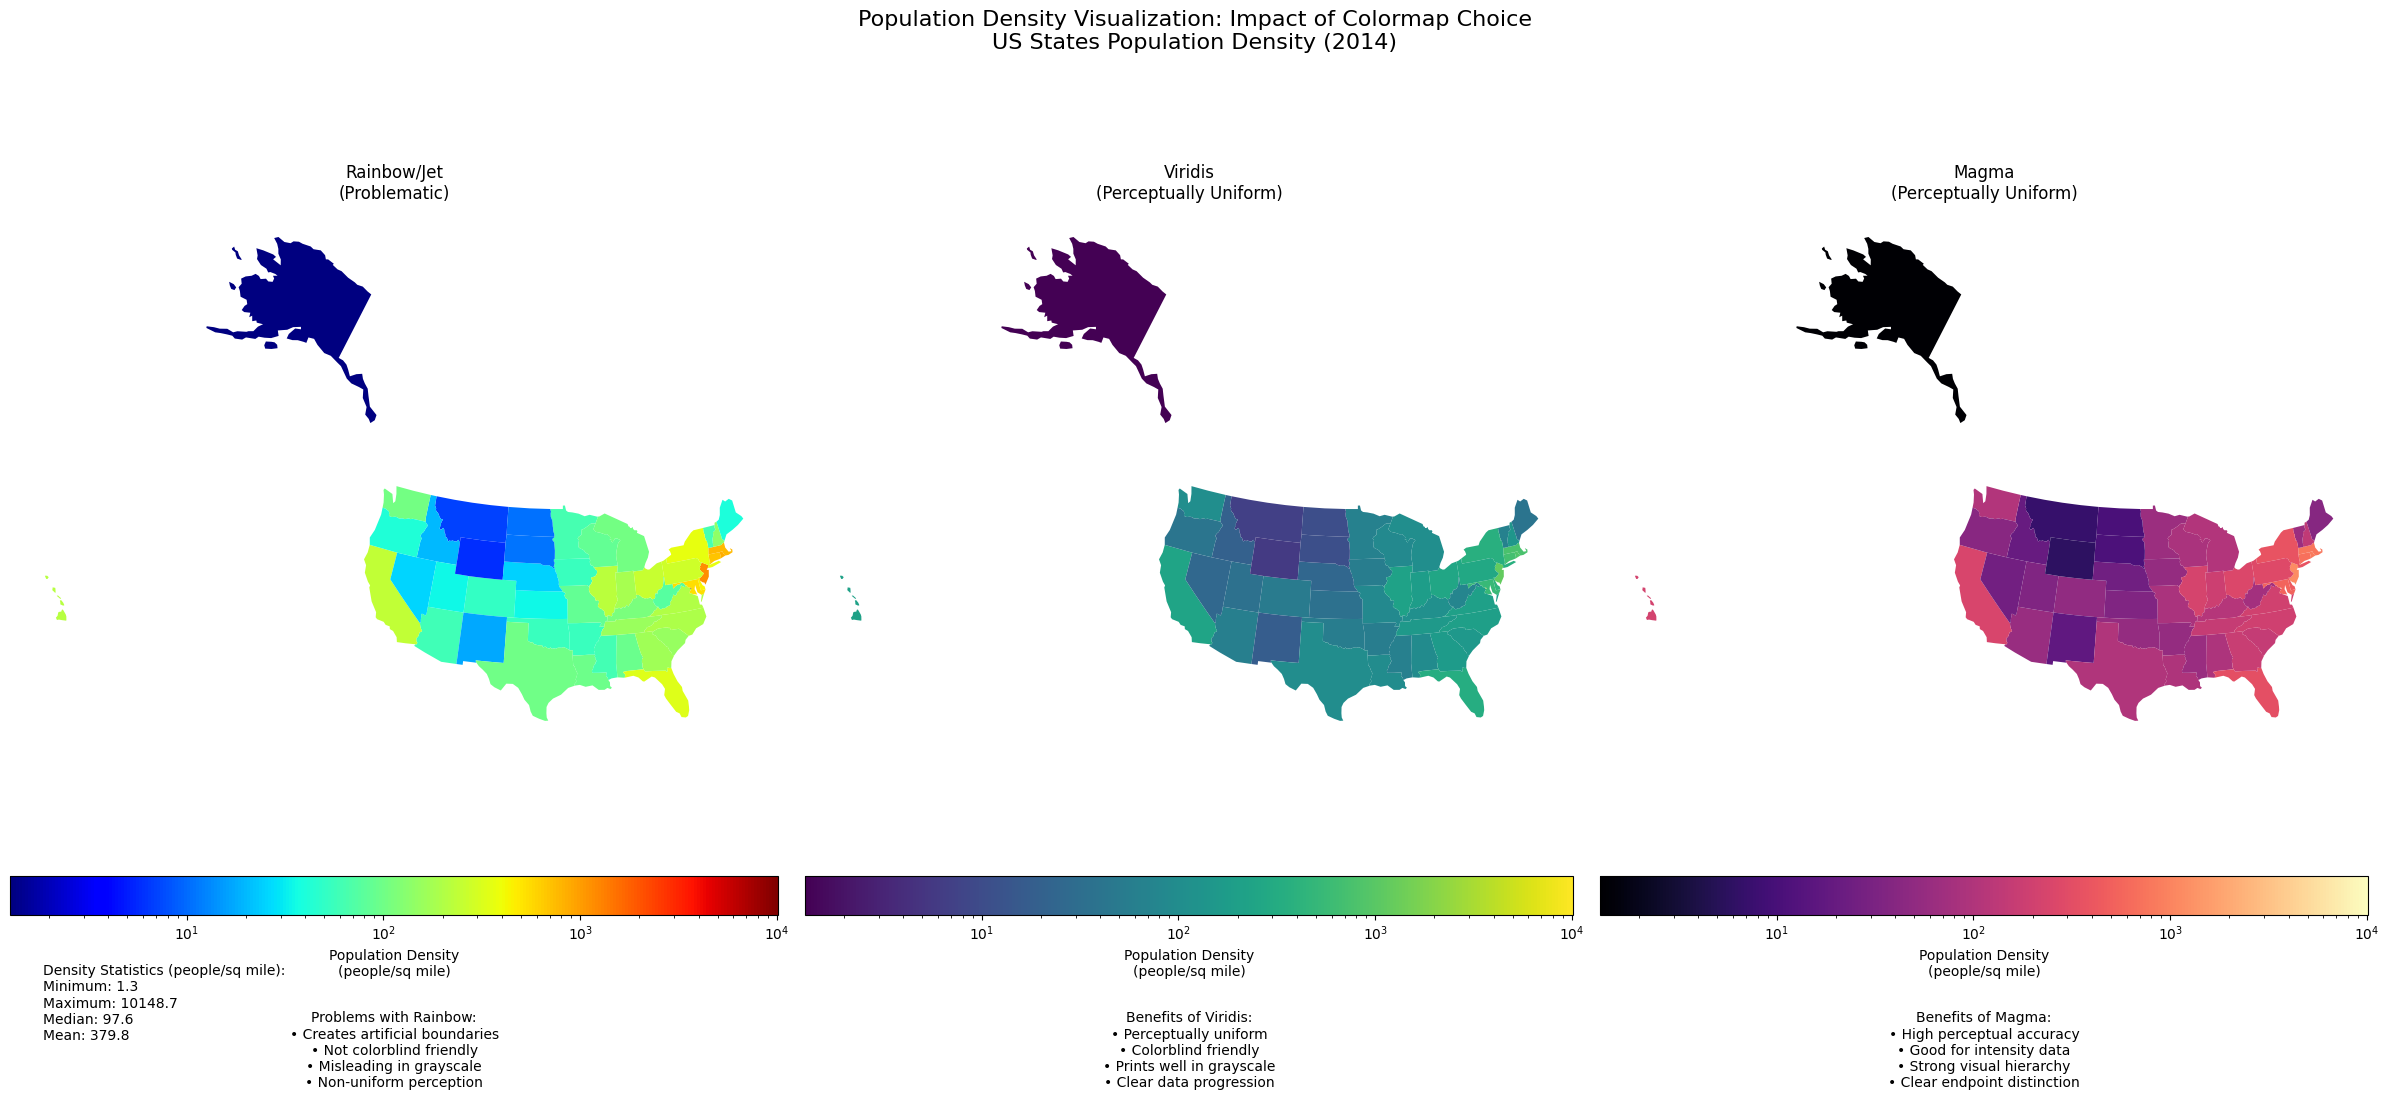

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, Normalize, LogNorm
import requests
import io
import sys
import matplotlib.colors as mcolors

def get_population_data():
    """
    Get 2014 population data from GitHub
    """
    print("Downloading population data...")
    pop_url = "https://gist.githubusercontent.com/bradoyler/0fd473541083cfa9ea6b5da57b08461c/raw/fa5f59ff1ce7ad9ff792e223b9ac05c564b7c0fe/us-state-populations.csv"
    population_df = pd.read_csv(pop_url)
    population_df['state'] = population_df['state']
    population_df['population'] = population_df['pop_2014']
    return population_df

def create_colormap_comparison(states_gdf, pop_df):
    """
    Create visualizations comparing rainbow (jet) with perceptually uniform colormaps
    """
    # Merge data and calculate density
    states_gdf = states_gdf.merge(pop_df[['state', 'population']],
                                 left_on='name',
                                 right_on='state')

    # Project to Albers Equal Area projection
    states_gdf = states_gdf.to_crs('EPSG:5070')

    # Calculate density
    states_gdf['area_sqmi'] = states_gdf.geometry.area / 2589988.11
    states_gdf['density'] = states_gdf['population'] / states_gdf['area_sqmi']

    # Create figure
    fig, axes = plt.subplots(1, 3, figsize=(24, 10))
    fig.suptitle('Population Density Visualization: Impact of Colormap Choice\nUS States Population Density (2014)',
                fontsize=16, y=1.05)

    # Use log normalization to better show the range of values
    norm = LogNorm(vmin=states_gdf['density'].min(),
                  vmax=states_gdf['density'].max())

    # Compare three colormaps
    cmaps = cmaps = ['jet', 'viridis', 'magma']
    titles = ['Rainbow/Jet\n(Problematic)',
             'Viridis\n(Perceptually Uniform)',
             'Magma\n(Perceptually Uniform)']

    for ax, cmap, title in zip(axes, cmaps, titles):
        states_gdf.plot(column='density',
                       cmap=cmap,
                       norm=norm,
                       legend=True,
                       legend_kwds={'label': 'Population Density\n(people/sq mile)',
                                  'orientation': 'horizontal'},
                       ax=ax)

        ax.set_title(title, fontsize=12, pad=10)
        ax.axis('off')

        # Add explanatory text for each colormap
        if cmap == 'jet':
            problems = (
                "Problems with Rainbow:\n"
                "• Creates artificial boundaries\n"
                "• Not colorblind friendly\n"
                "• Misleading in grayscale\n"
                "• Non-uniform perception"
            )
            ax.text(0.5, -0.5, problems, transform=ax.transAxes,
                   ha='center', va='top', fontsize=10)
        elif cmap == 'viridis':
            benefits = (
                "Benefits of Viridis:\n"
                "• Perceptually uniform\n"
                "• Colorblind friendly\n"
                "• Prints well in grayscale\n"
                "• Clear data progression"
            )
            ax.text(0.5, -0.5, benefits, transform=ax.transAxes,
                   ha='center', va='top', fontsize=10)
        else:  # magma
            benefits = (
                "Benefits of Magma:\n"
                "• High perceptual accuracy\n"
                "• Good for intensity data\n"
                "• Strong visual hierarchy\n"
                "• Clear endpoint distinction"
            )
            ax.text(0.5, -0.5, benefits, transform=ax.transAxes,
                   ha='center', va='top', fontsize=10)

    # Add density statistics
    stats_text = (
        f"Density Statistics (people/sq mile):\n"
        f"Minimum: {states_gdf['density'].min():.1f}\n"
        f"Maximum: {states_gdf['density'].max():.1f}\n"
        f"Median: {states_gdf['density'].median():.1f}\n"
        f"Mean: {states_gdf['density'].mean():.1f}"
    )
    fig.text(0.02, 0.02, stats_text, fontsize=10, ha='left')

    plt.tight_layout()
    plt.show()



def main():
    try:
        # Get population data
        pop_df = get_population_data()

        # Download and process shapefile
        print("Downloading geographic data...")
        url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_1_states_provinces.geojson"
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
        }

        response = requests.get(url, headers=headers)

        if response.status_code == 200:
            states_gdf = gpd.read_file(io.StringIO(response.content.decode('utf-8')))
            states_gdf = states_gdf[states_gdf['admin'] == 'United States of America']

            # Create visualizations
            create_colormap_comparison(states_gdf, pop_df)

        else:
            raise requests.RequestException(
                f"Failed to download geographic data. Status code: {response.status_code}"
            )

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        sys.exit(1)

if __name__ == "__main__":
    main()

# Quiz

This quiz focuses on visualizing geographic data using Matplotlib with a focus on color usage. The questions assume you have:

- states_gdf: A GeoDataFrame containing US state geometries
- pop_df: A DataFrame containing population data for states



In [ ]:
import matplotlib.colors as colors

# Load US states geometry and population data
print("Downloading population data...")
pop_url = "https://gist.githubusercontent.com/bradoyler/0fd473541083cfa9ea6b5da57b08461c/raw/fa5f59ff1ce7ad9ff792e223b9ac05c564b7c0fe/us-state-populations.csv"
pop_df = pd.read_csv(pop_url)
pop_df['state'] = pop_df['state']
pop_df['population'] = pop_df['pop_2014']


# Download and process shapefile
print("Downloading geographic data...")
url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_1_states_provinces.geojson"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    states_gdf = gpd.read_file(io.StringIO(response.content.decode('utf-8')))
    states_gdf = states_gdf[states_gdf['admin'] == 'United States of America']

else:
    raise requests.RequestException(
        f"Failed to download geographic data. Status code: {response.status_code}"
    )


## Question 1


Basic Choropleth Map

Fill in the blanks to create a basic choropleth map of state populations:

- Correctly merges population data with state geometries using the appropriate joining column
- Uses the population column for color encoding
- Selects a sequential colormap that effectively communicates population density variations
- Maintains state boundary lines for clear geographic reference

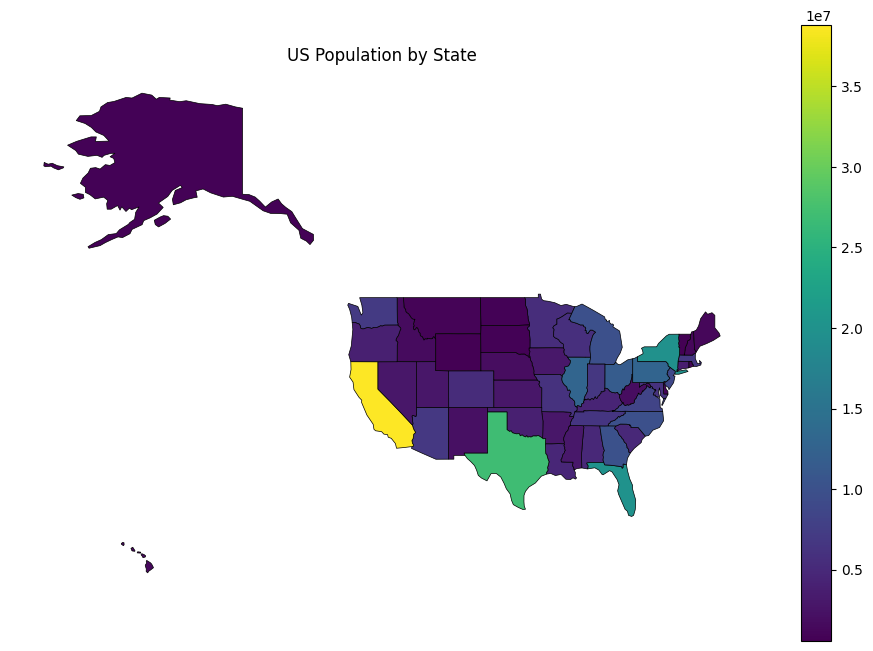

In [ ]:
# Merge data and calculate density
merged_df = # your solution here

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Create a choropleth map with population data
merged_df.plot(
    # your solution here
)

ax.set_title('US Population by State')
plt.axis('off')
plt.show()

## Question 2

Task: Complete the code to create a population density map that:

- Correctly calculates population density using population and area data
- Implements an appropriate normalization method that handles the skewed distribution of population density values
- Uses the 'YlOrRd' (Yellow-Orange-Red) sequential colormap, which is perceptually appropriate for density data
- Includes a properly labeled legend showing the density scale
- Maintains clear state boundaries for geographic reference
- Results in a visualization where both high-density and low-density regions can be meaningfully differentiated

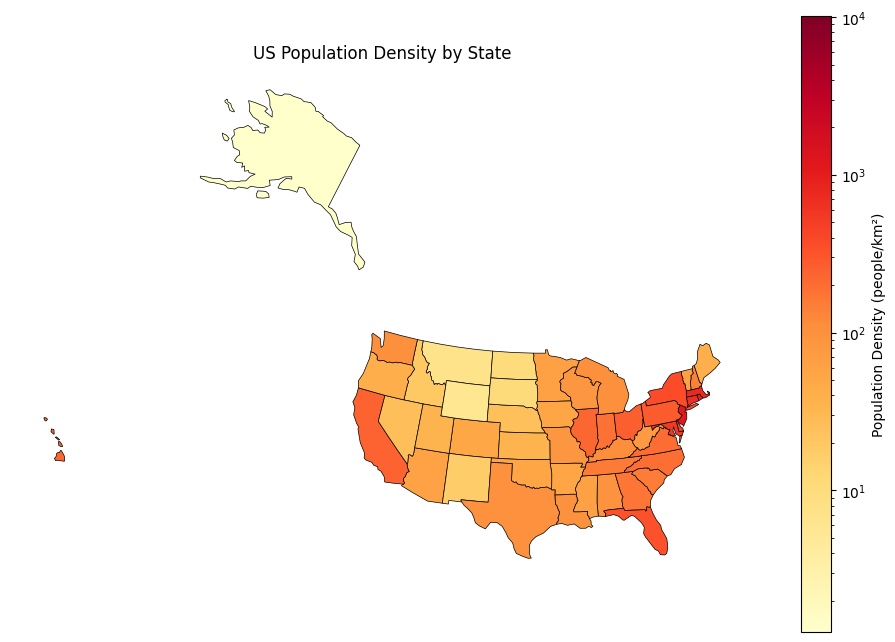

In [ ]:
# Calculate population density

# Project to Albers Equal Area projection
merged_df = merged_df.to_crs('EPSG:5070')

# Calculate density
merged_df['area_sqmi'] = merged_df.geometry.area / 2589988.11
merged_df['pop_density'] = merged_df['population'] / merged_df['area_sqmi']

# Create custom color normalization
norm = colors.________(
    vmin=merged_df['pop_density'].min(),
    vmax=merged_df['pop_density'].max()
)

# Solution: Normalize  # or LogNorm for logarithmic scale

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot with custom normalization
merged_df.plot(
    column=________,
    ax=ax,
    cmap=________,
    norm=________,
    legend=True,
    legend_kwds={'label': 'Population Density (people/km²)'},
    edgecolor='black',
    linewidth=0.5
)

ax.set_title('US Population Density by State')
plt.axis('off')
plt.show()

## Question 3

Fill in the blanks to create a symbol map with varying circle sizes:

- Uses color fill (choropleth technique) to represent population density across states
- Applies a hatching pattern as a second visual variable to identify states with above-median population
- Creates appropriate visual contrast between the two variables so both are legible
- Includes a custom legend that explains both visual encodings
Maintains clear state boundaries for geographic reference


Min/max X: -6058840.152162372, 2070299.5936644895
Min/max Y: 710011.6524781544, 5389436.40378705
Min/max Population: 584153, 38802500


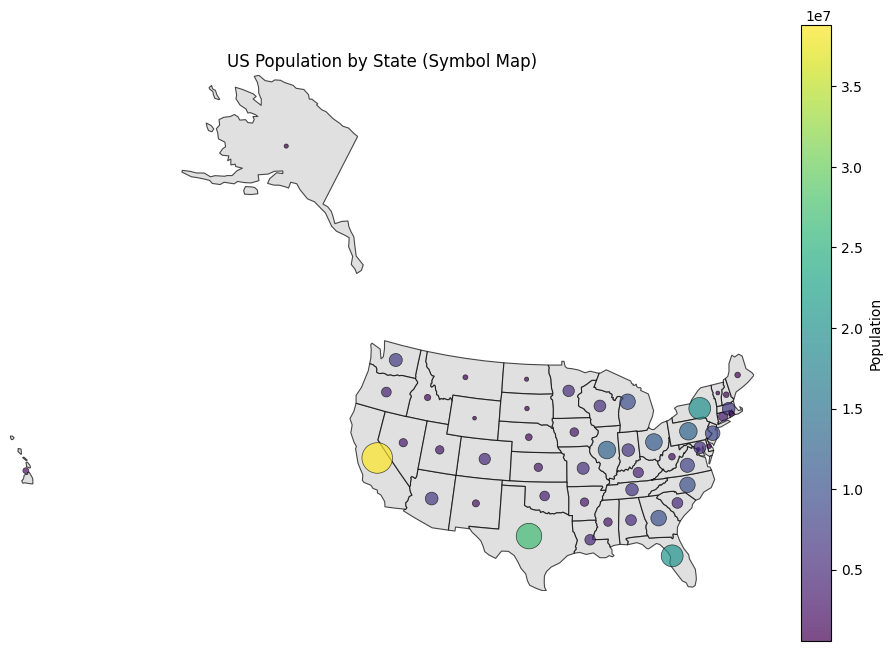

In [ ]:
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(12, 8))


states_gdf = states_gdf.to_crs('EPSG:5070')

# Plot base map
states_gdf.plot(

      # your solution here
)

# Make sure both dataframes have the same CRS
if states_gdf.crs != merged_df.crs:
    # Make sure base map uses the same projection
    merged_df = merged_df.to_crs(states_gdf.crs)


# Get state centroids
merged_df['centroid_x'] = merged_df.geometry.centroid.x
merged_df['centroid_y'] = merged_df.geometry.centroid.y

# Print some diagnostic information
print(f"Min/max X: {merged_df['centroid_x'].min()}, {merged_df['centroid_x'].max()}")
print(f"Min/max Y: {merged_df['centroid_y'].min()}, {merged_df['centroid_y'].max()}")
print(f"Min/max Population: {merged_df['population'].min()}, {merged_df['population'].max()}")

# Adjust the scaling factor - try a smaller divisor to make circles larger
scaling_factor = 80000  # Changed from 50000 to make circles more visible

# Create circles with size proportional to population
scatter = ax.scatter(

    # your solution here

    )

# Ensure axes limits include the full extent of the base map
ax.set_xlim(states_gdf.total_bounds[0], states_gdf.total_bounds[2])
ax.set_ylim(states_gdf.total_bounds[1], states_gdf.total_bounds[3])

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Population')

ax.set_title('US Population by State (Symbol Map)')
plt.axis('off')
plt.show()


## Question 4

Fill in the blanks to create a map:

- Uses color fill (choropleth technique) to represent population density across states
- Applies a hatching pattern as a second visual variable to identify states with above-median population
- Creates appropriate visual contrast between the two variables so both are legible
- Includes a custom legend that explains both visual encodings
- Maintains clear state boundaries for geographic reference


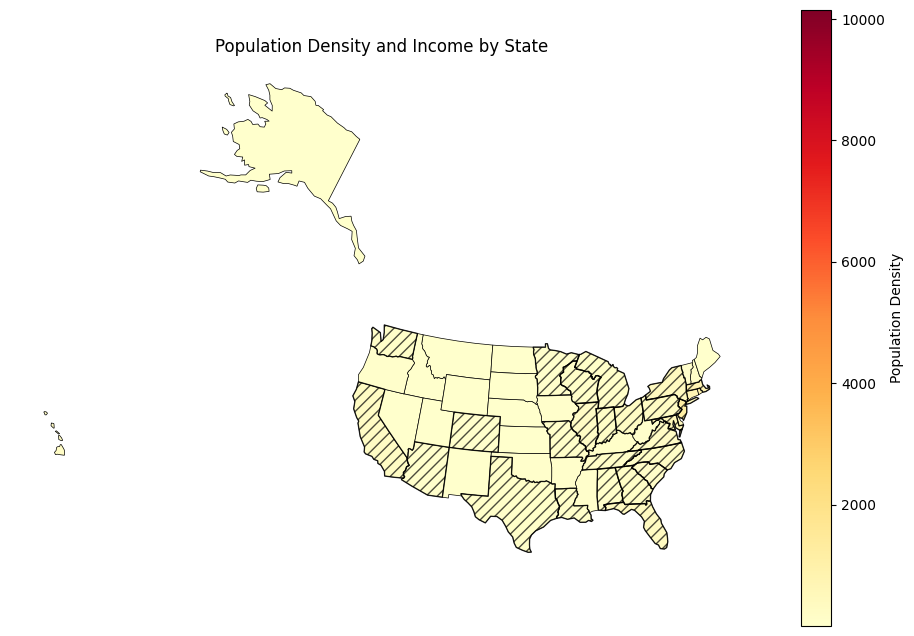

In [ ]:
from matplotlib.patches import PathPatch

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot base map with population density colors
merged_df.plot(

               # your solution here
)

population_median = merged_df['population'].median()

# Plot high population states with a cross-hatched overlay
high_pop_states = merged_df[merged_df['population'] > merged_df['population'].median()]


# Add hatching for states with population above the median
high_pop_states.plot(

                     # your solution here

)

ax.set_title('Population Density and Income by State')
plt.axis('off')
plt.show()
